# Problem Statement

#### Bomm Bikes a bike sharing company has made an attempt to understand the demand for shared bikes among the people. Specifically they want to understand the factors affecting the demand for shared bikes in the American market. The company wants to know:

###### 1. Which variables are significant in predicting demand demand for shared bikes.
###### 2. How well those variables describe the bike demands.

###### Goal:
- To create a linear model that quantitatively relates bike demand with variables, such as the holiday, weather, season or month etc.
- To know the accuracy of the model, i.e. how well do these variables predict the bike demand

##### Steps followed in the Linear Regression Modelling:
- Step 1: Reading and Understanding Data
- Step 2: Visualizing the Data
- Step 3: Prepare the data for Modelling
    - Encoding -> Binary Variable to 0 or 1
    - Categorical variable to dummy variables
    - Split the data to train and test set
    - Rescaling the features
- Step 4: Train the model
- Step 5: Residual Analysis
- Step 6: Prediction and Evaluation on Test data set

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries that will be used here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
#loading bike sharing data set
bike_df = pd.read_csv('day.csv')

### Step 1 - Reading and Understanding Data

In [4]:
#explore the data by looking at column and values
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2 - Visulazing Data
###### This is most important step to understand your data set.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We can make use of matplot lib and seaborn to visualize the data set.


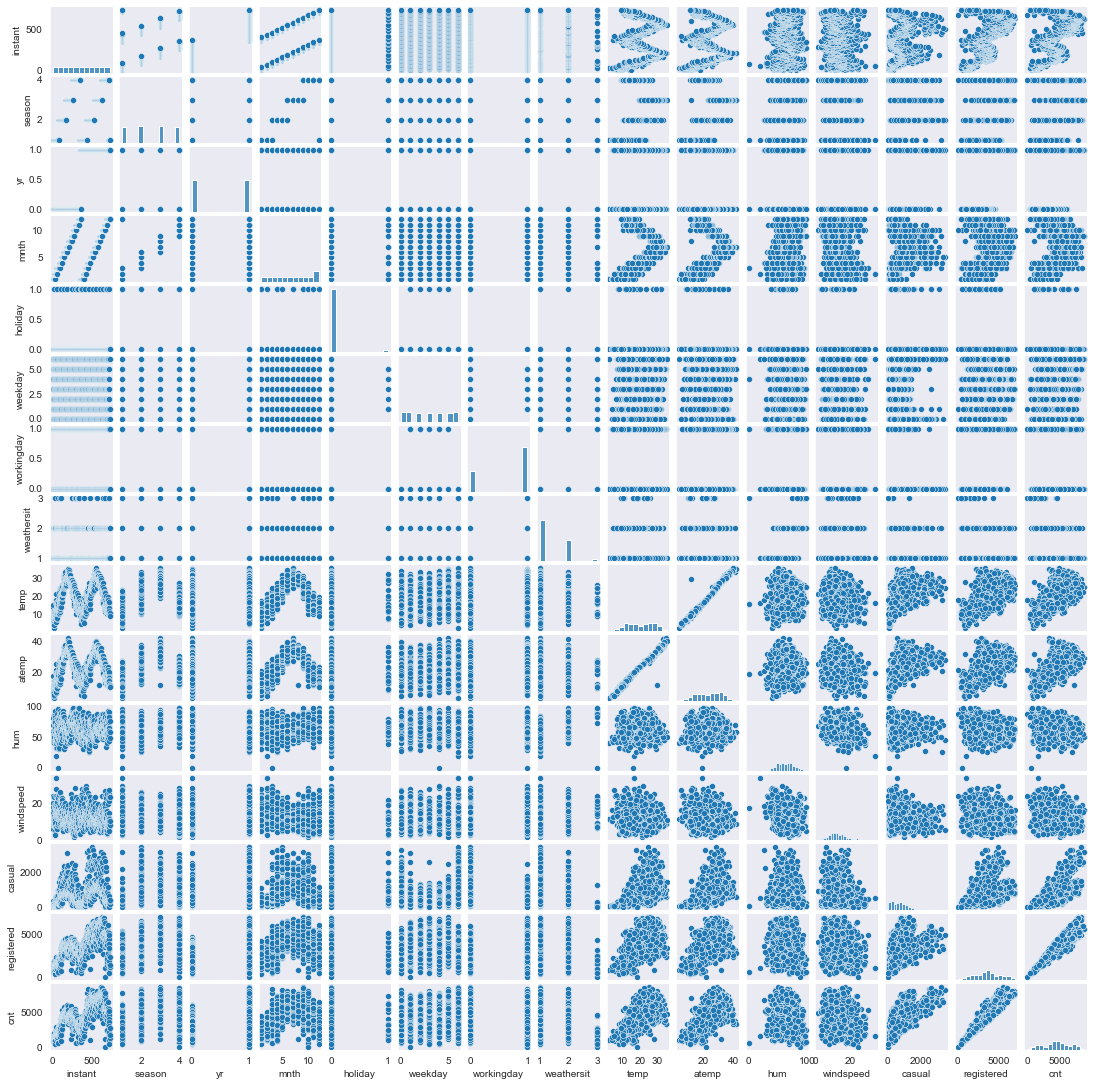

In [8]:
g = sns.pairplot(bike_df)
g.fig.set_size_inches(15,15)
plt.show()

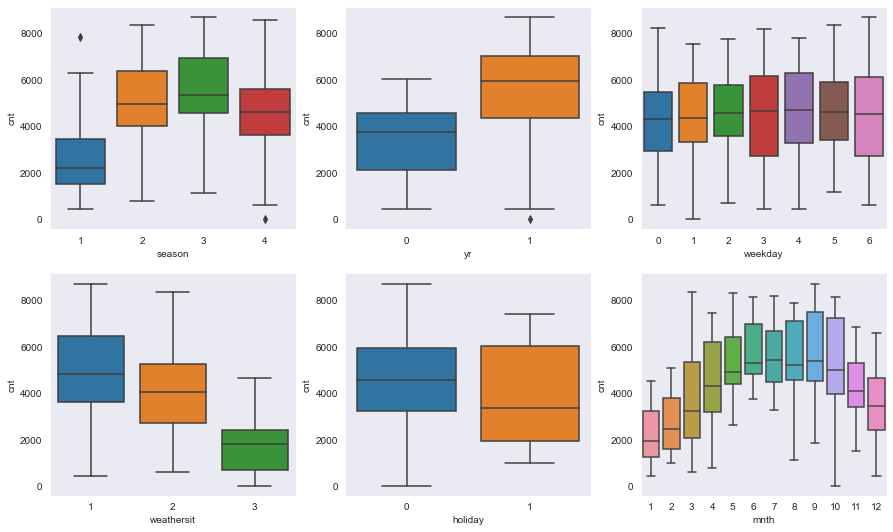

In [9]:
#box plot visualization for categorical variable with count (cnt)
plt.figure(figsize=(15,9))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)

plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)

plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)

plt.show()

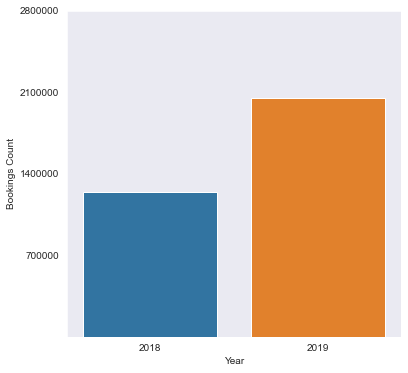

In [10]:
#Total Number of bookings in 2018 and 2019
plt.figure(figsize=(6,6))
g = sns.barplot(x='yr', y='cnt', data=bike_df, estimator=sum, ci=None)
ticks = [700000, 1400000, 2100000, 2800000]
g.set_yticks(ticks)
g.set_xticklabels(['2018', '2019'])
g.set(xlabel="Year", ylabel="Bookings Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

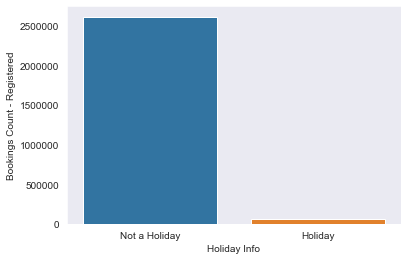

In [11]:
#holiday with registered and casual registrations
#plt.figure(figsize=(15,9))

#plt.subplot(1,2,1)
h = sns.barplot(x='holiday', y='registered', data=bike_df, estimator=sum, ci=None)
#ticks = [3000000, 6000000, 9000000, 12000000]
#h.set_yticks(ticks)
h.set_xticklabels(['Not a Holiday', 'Holiday'])
h.set(xlabel="Holiday Info", ylabel="Bookings Count - Registered")
plt.ticklabel_format(style='plain', axis='y')
#.set(title='Total Registered Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Registered Booking')


plt.show()

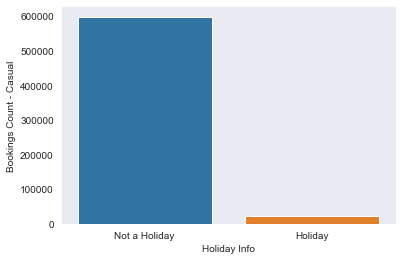

In [12]:
#plt.subplot(1,2,2)
i = sns.barplot(x = 'holiday', y = 'casual', data = bike_df, estimator=sum, ci=None)
#ticks = [200000, 400000, 600000, 800000]
#i.set_yticks(ticks)
i.set_xticklabels(['Not a Holiday', 'Holiday'])
i.set(xlabel="Holiday Info", ylabel="Bookings Count - Casual")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#.set(title='Total Casual Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Casual Booking')

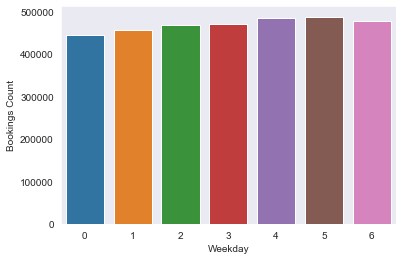

In [13]:
#plt.subplot(1,2,2)
i = sns.barplot(x = 'weekday', y = 'cnt', data = bike_df, estimator=sum, ci=None)
#ticks = [200000, 400000, 600000, 800000]
#i.set_yticks(ticks)

i.set(xlabel="Weekday", ylabel="Bookings Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#.set(title='Total Casual Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Casual Booking')

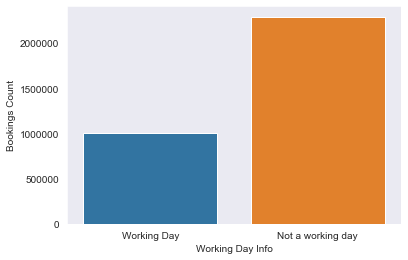

In [14]:
#plt.subplot(1,2,2)
i = sns.barplot(x = 'workingday', y = 'cnt', data = bike_df, estimator=sum, ci=None)
#ticks = [200000, 400000, 600000, 800000]
#i.set_yticks(ticks)
i.set_xticklabels(['Working Day', 'Not a working day'])
i.set(xlabel="Working Day Info", ylabel="Bookings Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#.set(title='Total Casual Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Casual Booking')

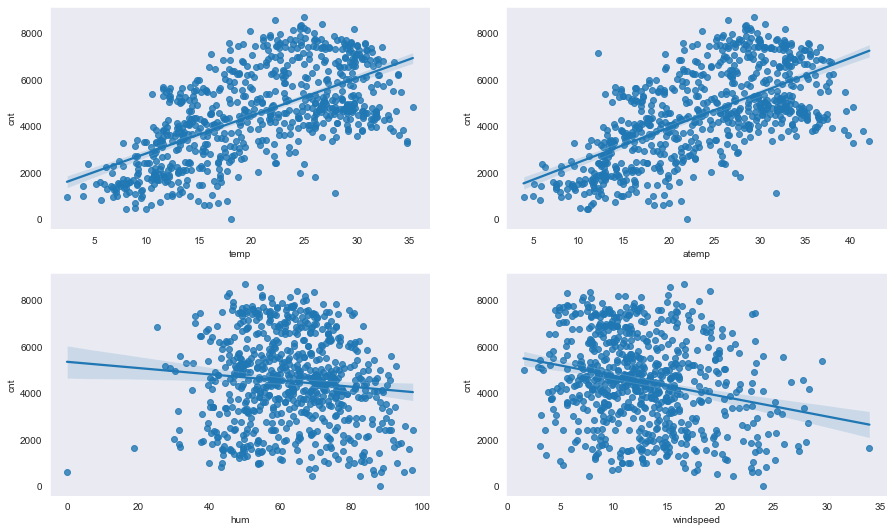

In [15]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.regplot(x='temp', y='cnt', data=bike_df)

plt.subplot(2,2,2)
sns.regplot(x='atemp', y='cnt', data=bike_df)

plt.subplot(2,2,3)
sns.regplot(x='hum', y='cnt', data=bike_df)

plt.subplot(2,2,4)
sns.regplot(x='windspeed', y='cnt', data=bike_df)


plt.show()

#Remove the following variables as it has no impact on outcome:
1. instant
2. dteday
3. casual
4. registered
5. temp



In [16]:
bike_df.drop(['instant', 'dteday', 'casual', 'registered', 'temp'], axis=1, inplace=True)

In [17]:
#our bike dataframe is simplified to:
bike_df.shape

(730, 11)

###### Analysis outcome with Step 1 & Step 2 - Reading &Visualizing data set:
- Seasonal Aspect, Demand is:
        - High in Summer and Fall 
        - Average in Winter
        - Low in Summer

- Weather Situation, Demand is:
        - High on Clear, Partly Cloudy days
        - Average on Misty, Cloudy days
        - Low on Snow and Rainy days

- Temperature and feels like temperature, Demand:
        - Surges as temperature rises
        
- Higher Humidity and Lower windspeed shows higher booking 

- Month Aspect, Demand:
        - Peak near month of May, June, July, August September
        - Tapers on either side of the year w.r.t above months.

- Registered Customers with respect to holidays/non-holidays:
        - Higher percentage of booking(both casual and registered) happens in non-holidays.
        - During holiday the booking remains very low (both casual and registered) when compared to non-holidays.

- Total Number of Bookings has seen good increase from year 2018 to 2019.
- Number of booking count is high on a non-working day when compared to working day.

### Step 3 - Prepare the Data for Modelling

###### Apply Encoding and One-Hot Technique for columns
- season
- mnth
- weekday
- weathersit

#### Split the data into training and test data set

In [18]:
bike_df.shape

(730, 11)

#### ENCODING - One Hot Technique - STARTS

In [19]:
#One - hot encoding for column 'season':

# Defining the map function
def season_string_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Applying the function to the bike df 
bike_df[['season']] = bike_df[['season']].apply(season_string_map)

In [20]:
bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [21]:
bike_df = pd.get_dummies(bike_df, columns=['season'])

In [22]:
#One - hot encoding for column 'mnth':

# Defining the map function
def mnth_string_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
                  5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Applying the function to the bike df 
bike_df[['mnth']] = bike_df[['mnth']].apply(mnth_string_map)

In [23]:
bike_df = pd.get_dummies(bike_df, columns=['mnth'])

In [24]:
#One - hot encoding for column 'week day':

# Defining the map function
def weekday_string_map(x):
    return x.map({6: 'Mon', 0: 'Tue', 1: 'Wed', 2: 'Thu', 
                  3: 'Fri', 4: 'Sat', 5: 'Sun'})

# Applying the function to the bike df 
bike_df[['weekday']] = bike_df[['weekday']].apply(weekday_string_map)

In [25]:
bike_df = pd.get_dummies(bike_df, columns=['weekday'])

In [26]:
#One - hot encoding for column 'weathersit':

# Defining the map function
def weathersit_string_map(x):
    return x.map({1: 'Clear', 0: 'Misty', 1: 'Light_Snow', 2: 'Heavy_Rain'})

# Applying the function to the bike df 
bike_df[['weathersit']] = bike_df[['weathersit']].apply(weathersit_string_map)

In [27]:
bike_df = pd.get_dummies(bike_df, columns=['weathersit'])

In [28]:
bike_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Heavy_Rain,weathersit_Light_Snow
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


#### ENCODING - One Hot Technique - ENDS

In [29]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

bike_df_train, bike_df_test = train_test_split(bike_df, train_size=0.5, random_state=100)
print('Train data shape: ', bike_df_train.shape)
print('Test data shape: ', bike_df_test.shape)

Train data shape:  (365, 32)
Test data shape:  (365, 32)


In [30]:
bike_df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Heavy_Rain,weathersit_Light_Snow
417,1,0,1,19.63335,56.7917,15.709557,4773,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
55,0,0,1,17.52305,71.2174,23.218113,1461,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
388,1,0,1,17.45540,83.5833,8.292389,4339,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
146,0,0,1,31.85040,65.3750,16.125493,4679,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
592,1,0,1,32.73440,51.9167,9.500332,7605,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Rescaling of features

Rescaling of feature or predictor variables may not be essential in case of simple linear regression, as it deals with
one predictor variable. Here in MLR - multiple linear regression, we need to scale the variables so their coefficients 
are comparable when you build models. The different techniques for scaling: 
1. Min-Max Scaling (normalization): between 0 and 1
2. Standardization (mean - 0, sigma - 1)

Advantages of Rescaling:
1. Interpretability of data and models become easier
2. Data processing would be faster for large dataset and models can be built in relatively short time interval.

Here in this case study we would be using Min-Max Scaling.

Formula for Min-Max scaling:

normalization: (x - x_min)/(x_max - x_min)

In [31]:


#1. Instantiate MinMax Scaler
min_max_scaler = MinMaxScaler()

#create list of numeric vars
numeric_vars = ['atemp', 'hum', 'windspeed', 'cnt']

bike_df_train[numeric_vars] = min_max_scaler.fit_transform(bike_df_train[numeric_vars])



In [32]:
bike_df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Heavy_Rain,weathersit_Light_Snow
417,1,0,1,0.411639,0.585230,0.409183,0.546595,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
55,0,0,1,0.356238,0.733885,0.651724,0.165555,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
388,1,0,1,0.354462,0.861313,0.169595,0.496664,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
146,0,0,1,0.732369,0.673679,0.422619,0.535780,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
592,1,0,1,0.755577,0.534994,0.208614,0.872411,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [33]:
bike_df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Heavy_Rain,weathersit_Light_Snow
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.512329,0.016438,0.693151,0.513085,0.649367,0.323520,0.516252,0.257534,0.249315,0.252055,0.241096,0.063014,0.098630,0.084932,0.065753,0.084932,0.065753,0.082192,0.112329,0.101370,0.079452,0.087671,0.073973,0.175342,0.158904,0.134247,0.131507,0.117808,0.131507,0.150685,0.328767,0.638356
std,0.500534,0.127329,0.461819,0.214840,0.147698,0.175151,0.230120,0.437876,0.433210,0.434789,0.428336,0.243321,0.298574,0.279162,0.248191,0.279162,0.248191,0.275034,0.316204,0.302232,0.270814,0.283204,0.262086,0.380782,0.366088,0.341385,0.338418,0.322823,0.338418,0.358233,0.470410,0.481136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339548,0.537999,0.193806,0.350437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.536771,0.652211,0.301468,0.517602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.690109,0.756977,0.414520,0.701335,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


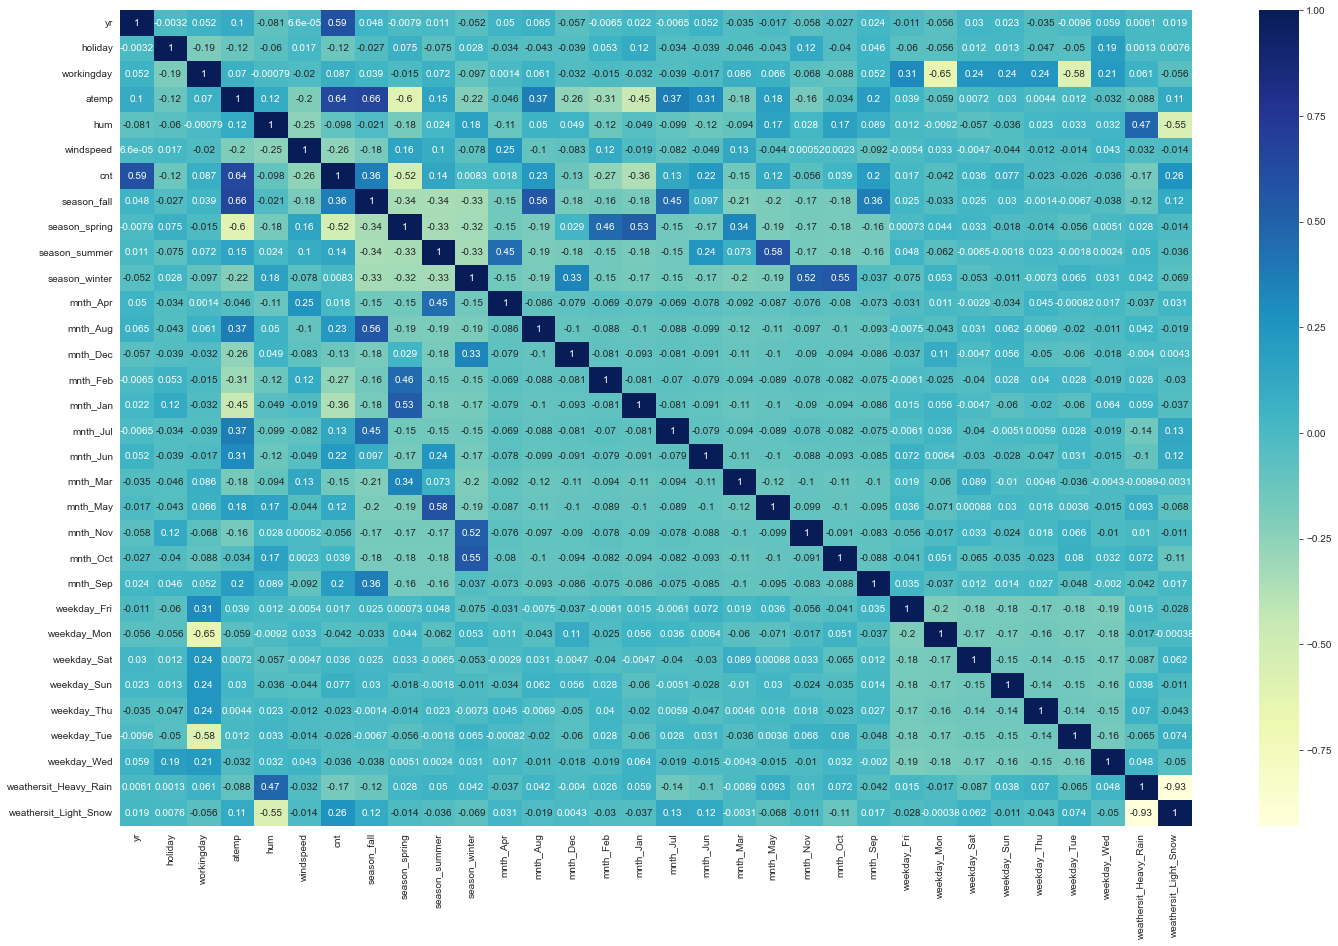

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 15))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Dividing into X and Y sets for the model building

In [35]:
#adding all columns to the model.
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [36]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

### Step 4 - Train the Model

###### Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.


Conditions considered in dropping features:

    High - p , High - VIF -> should be dropped
    High - Low -> ??
        High - p , Low - VIF -> remove these first and re-run the model
        High - VIF , Low - p -> remove these after the above case.
    Low - p , Low - VIF -> we can keep this feature
    

Conditions applied: Feature have values are dropped with given values:
- VIF > 6.5 dropped (Industry standard practice few consider below 10 is good, but conservative models look at 5 as critical value for banking and healthcare related ones. Here I have chosen average at 6.5 as critical value for VIF)
- p-Value > 0.05 dropped



In [37]:
# Add a constant - a statsmodel will not coeff factor.
X_train_lm = sm.add_constant(X_train)

lr_all = sm.OLS(y_train, X_train_lm).fit()

lr_all.params

const                    0.064235
yr                       0.239539
holiday                 -0.057108
workingday               0.047521
atemp                    0.430982
hum                     -0.175943
windspeed               -0.202995
season_fall             -0.012597
season_spring           -0.052021
season_summer            0.034344
season_winter            0.094508
mnth_Apr                 0.018368
mnth_Aug                 0.050690
mnth_Dec                -0.043997
mnth_Feb                -0.031878
mnth_Jan                -0.074209
mnth_Jul                -0.011866
mnth_Jun                 0.020831
mnth_Mar                 0.010949
mnth_May                 0.030730
mnth_Nov                -0.029400
mnth_Oct                 0.014983
mnth_Sep                 0.109034
weekday_Fri              0.003990
weekday_Mon              0.063534
weekday_Sat              0.009118
weekday_Sun              0.012464
weekday_Thu             -0.016665
weekday_Tue              0.010289
weekday_Wed   

In [38]:
print(lr_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     69.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.36e-120
Time:                        07:00:34   Log-Likelihood:                 362.46
No. Observations:                 365   AIC:                            -668.9
Df Residuals:                     337   BIC:                            -559.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

#### Analysis on above stats model result:

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.
Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖= 1 / (1−𝑅𝑖^2)
¶

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,mnth_Jul,inf
13,mnth_Feb,inf
23,weekday_Mon,inf
22,weekday_Fri,inf
21,mnth_Sep,inf
20,mnth_Oct,inf
19,mnth_Nov,inf
18,mnth_May,inf
17,mnth_Mar,inf
16,mnth_Jun,inf


##### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

We need to drop the variable:weekday_Sat and update the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. 
One of these variables is, weekday_Sat as it has a very high p-value of 0.890. 

Lets drop this variable, and check out the result again.

Note: We should drop only one predictor variable at a time and evaluate the model again.


In [40]:
# Dropping highly correlated variables and insignificant variables

X_drop_1 = X_train.drop('weekday_Sat', 1)

In [41]:
X_drop_1.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [42]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_1_lm = sm.add_constant(X_drop_1)

lr_drop_1 = sm.OLS(y_train, X_drop_1_lm).fit()

lr_drop_1.params

const                    0.067115
yr                       0.239539
holiday                 -0.051829
workingday               0.052800
atemp                    0.430982
hum                     -0.175943
windspeed               -0.202995
season_fall             -0.011877
season_spring           -0.051301
season_summer            0.035064
season_winter            0.095228
mnth_Apr                 0.018608
mnth_Aug                 0.050930
mnth_Dec                -0.043757
mnth_Feb                -0.031638
mnth_Jan                -0.073969
mnth_Jul                -0.011626
mnth_Jun                 0.021071
mnth_Mar                 0.011189
mnth_May                 0.030970
mnth_Nov                -0.029160
mnth_Oct                 0.015223
mnth_Sep                 0.109274
weekday_Fri             -0.005128
weekday_Mon              0.059695
weekday_Sun              0.003346
weekday_Thu             -0.025783
weekday_Tue              0.006449
weekday_Wed             -0.027611
weathersit_Hea

In [43]:
print(lr_drop_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     69.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.36e-120
Time:                        07:00:35   Log-Likelihood:                 362.46
No. Observations:                 365   AIC:                            -668.9
Df Residuals:                     337   BIC:                            -559.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_1.columns
vif['VIF'] = [variance_inflation_factor(X_drop_1.values, i) for i in range(X_drop_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,mnth_Jul,inf
20,mnth_Oct,inf
18,mnth_May,inf
17,mnth_Mar,inf
16,mnth_Jun,inf
1,holiday,inf
14,mnth_Jan,inf
13,mnth_Feb,inf
12,mnth_Dec,inf
11,mnth_Aug,inf


In [45]:
#now let drop: weekday_Tue - Dropping highly correlated variables and insignificant variables

X_drop_2 = X_drop_1.drop('weekday_Tue', 1)

In [46]:
X_drop_2.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Wed', 'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [47]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_2_lm = sm.add_constant(X_drop_2)

lr_drop_2 = sm.OLS(y_train, X_drop_2_lm).fit()

lr_drop_2.params

const                    0.071952
yr                       0.239539
holiday                 -0.058279
workingday               0.046350
atemp                    0.430982
hum                     -0.175943
windspeed               -0.202995
season_fall             -0.010668
season_spring           -0.050092
season_summer            0.036274
season_winter            0.096438
mnth_Apr                 0.019011
mnth_Aug                 0.051333
mnth_Dec                -0.043354
mnth_Feb                -0.031235
mnth_Jan                -0.073566
mnth_Jul                -0.011223
mnth_Jun                 0.021474
mnth_Mar                 0.011592
mnth_May                 0.031373
mnth_Nov                -0.028757
mnth_Oct                 0.015627
mnth_Sep                 0.109677
weekday_Fri             -0.005128
weekday_Mon              0.053245
weekday_Sun              0.003346
weekday_Thu             -0.025783
weekday_Wed             -0.027611
weathersit_Heavy_Rain    0.194176
weathersit_Lig

In [48]:
lr_drop_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     69.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.36e-120
Time:                        07:00:35   Log-Likelihood:                 362.46
No. Observations:                 365   AIC:                            -668.9
Df Residuals:                     337   BIC:                            -559.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0720      0.042      1.711      0.088      -0.011       0.155
yr                        0.2395      0.010     23.803      0.000       0.220       0.259
holiday                  -0.0583      0.044     -1.327      0.185      -0.145       0.028
workingday                0.0464      0.019      2.386      0.018       0.008       0.085
atemp                     0.4310      0.054      7.931      0.000       0.324       0.538
hum                      -0.1759      0.046     -3.805      0.000      -0.267      -0.085
windspeed                -0.2030      0.032     -6.425      0.000      -0.265      -0.141
season_fall              -0.0107      0.024     -0.440      0.660      -0.058       0.037
season_spring            -0.0501      0.022     -2.229      0.026      -0.094      -0.006
season_summer             0.0363      0.021      1.695      0.091      -0.006       0.078
season_winter             0.0964      0.025      3.824      0.000       0.047       0.146
mnth_Apr                  0.0190      0.027      0.695      0.488      -0.035       0.073
mnth_Aug                  0.0513      0.029      1.776      0.077      -0.006       0.108
mnth_Dec                 -0.0434      0.025     -1.722      0.086      -0.093       0.006
mnth_Feb                 -0.0312      0.029     -1.091      0.276      -0.088       0.025
mnth_Jan                 -0.0736      0.030     -2.478      0.014      -0.132      -0.015
mnth_Jul                 -0.0112      0.032     -0.350      0.726      -0.074       0.052
mnth_Jun                  0.0215      0.025      0.849      0.396      -0.028       0.071
mnth_Mar                  0.0116      0.020      0.574      0.566      -0.028       0.051
mnth_May                  0.0314      0.026      1.201      0.231      -0.020       0.083
mnth_Nov                 -0.0288      0.029     -0.978      0.329      -0.087       0.029
mnth_Oct                  0.0156      0.028      0.549      0.583      -0.040       0.072
mnth_Sep                  0.1097      0.025      4.361      0.000       0.060       0.159
weekday_Fri              -0.0051      0.018     -0.286      0.775      -0.040       0.030
weekday_Mon               0.0532      0.019      2.867      0.004       0.017       0.090
weekday_Sun               0.0033      0.019      0.174      0.862      -0.034       0.041
weekday_Thu              -0.0258      0.020     -1.296      0.196      -0.065       0.013
weekday_Wed              -0.0276      0.019     -1.470      0.142      -0.065       0.009
weathersit_Heavy_Rain     0.1942      0.030      6.483      0.000       0.135       0.253
weathersit_Light_Snow     0.2513      0.031      8.011      0.000       0.190       0.313
==============================================================================
Omnibus:                       63.

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_2.columns
vif['VIF'] = [variance_inflation_factor(X_drop_2.values, i) for i in range(X_drop_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,mnth_Jan,inf
16,mnth_Jun,inf
21,mnth_Sep,inf
20,mnth_Oct,inf
19,mnth_Nov,inf
18,mnth_May,inf
6,season_fall,inf
7,season_spring,inf
8,season_summer,inf
9,season_winter,inf


In [50]:
#now let drop: mnth_Apr - Dropping highly correlated variables and insignificant variables

X_drop_3 = X_drop_2.drop('mnth_Apr', 1)

In [51]:
X_drop_3.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Wed', 'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [52]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_3_lm = sm.add_constant(X_drop_3)

lr_drop_3 = sm.OLS(y_train, X_drop_3_lm).fit()

lr_drop_3.params

const                    0.087160
yr                       0.239539
holiday                 -0.058279
workingday               0.046350
atemp                    0.430982
hum                     -0.175943
windspeed               -0.202995
season_fall             -0.006865
season_spring           -0.046290
season_summer            0.040076
season_winter            0.100240
mnth_Aug                 0.032322
mnth_Dec                -0.062365
mnth_Feb                -0.050245
mnth_Jan                -0.092577
mnth_Jul                -0.030233
mnth_Jun                 0.002464
mnth_Mar                -0.007418
mnth_May                 0.012362
mnth_Nov                -0.047768
mnth_Oct                -0.003384
mnth_Sep                 0.090667
weekday_Fri             -0.005128
weekday_Mon              0.053245
weekday_Sun              0.003346
weekday_Thu             -0.025783
weekday_Wed             -0.027611
weathersit_Heavy_Rain    0.194176
weathersit_Light_Snow    0.251296
dtype: float64

In [53]:
lr_drop_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     69.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.36e-120
Time:                        07:00:36   Log-Likelihood:                 362.46
No. Observations:                 365   AIC:                            -668.9
Df Residuals:                     337   BIC:                            -559.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0872      0.050      1.731      0.084      -0.012       0.186
yr                        0.2395      0.010     23.803      0.000       0.220       0.259
holiday                  -0.0583      0.044     -1.327      0.185      -0.145       0.028
workingday                0.0464      0.019      2.386      0.018       0.008       0.085
atemp                     0.4310      0.054      7.931      0.000       0.324       0.538
hum                      -0.1759      0.046     -3.805      0.000      -0.267      -0.085
windspeed                -0.2030      0.032     -6.425      0.000      -0.265      -0.141
season_fall              -0.0069      0.026     -0.267      0.790      -0.058       0.044
season_spring            -0.0463      0.024     -1.936      0.054      -0.093       0.001
season_summer             0.0401      0.019      2.110      0.036       0.003       0.077
season_winter             0.1002      0.028      3.579      0.000       0.045       0.155
mnth_Aug                  0.0323      0.041      0.782      0.435      -0.049       0.114
mnth_Dec                 -0.0624      0.043     -1.450      0.148      -0.147       0.022
mnth_Feb                 -0.0502      0.042     -1.206      0.229      -0.132       0.032
mnth_Jan                 -0.0926      0.043     -2.169      0.031      -0.177      -0.009
mnth_Jul                 -0.0302      0.044     -0.693      0.489      -0.116       0.056
mnth_Jun                  0.0025      0.032      0.078      0.938      -0.060       0.065
mnth_Mar                 -0.0074      0.032     -0.235      0.814      -0.069       0.055
mnth_May                  0.0124      0.027      0.463      0.644      -0.040       0.065
mnth_Nov                 -0.0478      0.047     -1.024      0.307      -0.140       0.044
mnth_Oct                 -0.0034      0.046     -0.074      0.941      -0.094       0.087
mnth_Sep                  0.0907      0.040      2.261      0.024       0.012       0.170
weekday_Fri              -0.0051      0.018     -0.286      0.775      -0.040       0.030
weekday_Mon               0.0532      0.019      2.867      0.004       0.017       0.090
weekday_Sun               0.0033      0.019      0.174      0.862      -0.034       0.041
weekday_Thu              -0.0258      0.020     -1.296      0.196      -0.065       0.013
weekday_Wed              -0.0276      0.019     -1.470      0.142      -0.065       0.009
weathersit_Heavy_Rain     0.1942      0.030      6.483      0.000       0.135       0.253
weathersit_Light_Snow     0.2513      0.031      8.011      0.000       0.190       0.313
==============================================================================
Omnibus:                       63.709   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarqu

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_3.columns
vif['VIF'] = [variance_inflation_factor(X_drop_3.values, i) for i in range(X_drop_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,season_winter,50.72
6,season_fall,48.76
7,season_spring,47.38
8,season_summer,37.36
27,weathersit_Light_Snow,9.53
26,weathersit_Heavy_Rain,8.30
19,mnth_Oct,7.06
18,mnth_Nov,6.68
10,mnth_Aug,6.37
11,mnth_Dec,6.03


In [55]:
#let drop mnth_Mar

#now let drop: mnth_Mar - Dropping highly insignificant variables

X_drop_4 = X_drop_3.drop('mnth_Mar', 1)

In [56]:
X_drop_4.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Fri',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Wed',
       'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [57]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_4_lm = sm.add_constant(X_drop_4)

lr_drop_4 = sm.OLS(y_train, X_drop_4_lm).fit()

lr_drop_4.params

const                    0.082151
yr                       0.239687
holiday                 -0.058495
workingday               0.046141
atemp                    0.432828
hum                     -0.176286
windspeed               -0.201854
season_fall             -0.007220
season_spring           -0.049596
season_summer            0.040853
season_winter            0.098114
mnth_Aug                 0.036087
mnth_Dec                -0.055722
mnth_Feb                -0.042807
mnth_Jan                -0.084907
mnth_Jul                -0.026658
mnth_Jun                 0.005478
mnth_May                 0.015228
mnth_Nov                -0.041630
mnth_Oct                 0.002590
mnth_Sep                 0.094938
weekday_Fri             -0.005075
weekday_Mon              0.053331
weekday_Sun              0.003424
weekday_Thu             -0.025570
weekday_Wed             -0.027484
weathersit_Heavy_Rain    0.194237
weathersit_Light_Snow    0.251474
dtype: float64

In [58]:
lr_drop_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     72.43
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.63e-121
Time:                        07:00:36   Log-Likelihood:                 362.43
No. Observations:                 365   AIC:                            -670.9
Df Residuals:                     338   BIC:                            -565.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0822      0.046      1.802      0.072      -0.008       0.172
yr                        0.2397      0.010     23.898      0.000       0.220       0.259
holiday                  -0.0585      0.044     -1.334      0.183      -0.145       0.028
workingday                0.0461      0.019      2.381      0.018       0.008       0.084
atemp                     0.4328      0.054      8.061      0.000       0.327       0.538
hum                      -0.1763      0.046     -3.820      0.000      -0.267      -0.086
windspeed                -0.2019      0.031     -6.474      0.000      -0.263      -0.141
season_fall              -0.0072      0.026     -0.281      0.779      -0.058       0.043
season_spring            -0.0496      0.019     -2.567      0.011      -0.088      -0.012
season_summer             0.0409      0.019      2.187      0.029       0.004       0.078
season_winter             0.0981      0.026      3.706      0.000       0.046       0.150
mnth_Aug                  0.0361      0.038      0.948      0.344      -0.039       0.111
mnth_Dec                 -0.0557      0.032     -1.719      0.086      -0.119       0.008
mnth_Feb                 -0.0428      0.027     -1.577      0.116      -0.096       0.011
mnth_Jan                 -0.0849      0.028     -3.085      0.002      -0.139      -0.031
mnth_Jul                 -0.0267      0.041     -0.652      0.515      -0.107       0.054
mnth_Jun                  0.0055      0.029      0.190      0.849      -0.051       0.062
mnth_May                  0.0152      0.024      0.641      0.522      -0.031       0.062
mnth_Nov                 -0.0416      0.039     -1.078      0.282      -0.118       0.034
mnth_Oct                  0.0026      0.038      0.068      0.946      -0.072       0.078
mnth_Sep                  0.0949      0.036      2.658      0.008       0.025       0.165
weekday_Fri              -0.0051      0.018     -0.283      0.777      -0.040       0.030
weekday_Mon               0.0533      0.019      2.876      0.004       0.017       0.090
weekday_Sun               0.0034      0.019      0.178      0.859      -0.034       0.041
weekday_Thu              -0.0256      0.020     -1.288      0.199      -0.065       0.013
weekday_Wed              -0.0275      0.019     -1.466      0.144      -0.064       0.009
weathersit_Heavy_Rain     0.1942      0.030      6.494      0.000       0.135       0.253
weathersit_Light_Snow     0.2515      0.031      8.030      0.000       0.190       0.313
==============================================================================
Omnibus:                       63.828   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.225
Skew:                          -0.820   Prob(JB):       

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_4.columns
vif['VIF'] = [variance_inflation_factor(X_drop_4.values, i) for i in range(X_drop_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_fall,43.16
9,season_winter,41.43
7,season_spring,34.33
8,season_summer,33.94
26,weathersit_Light_Snow,9.52
25,weathersit_Heavy_Rain,8.30
3,atemp,5.58
10,mnth_Aug,5.42
18,mnth_Oct,4.89
17,mnth_Nov,4.59


In [60]:
#let drop mnth_Oct

#now let drop: mnth_Oct - Dropping highly insignificant variables

X_drop_5 = X_drop_4.drop('mnth_Oct', 1)

In [61]:
X_drop_5.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Fri', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Wed', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [62]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_5_lm = sm.add_constant(X_drop_5)

lr_drop_5 = sm.OLS(y_train, X_drop_5_lm).fit()

lr_drop_5.params

const                    0.082728
yr                       0.239653
holiday                 -0.058446
workingday               0.046111
atemp                    0.432933
hum                     -0.176069
windspeed               -0.201805
season_fall             -0.007104
season_spring           -0.049908
season_summer            0.040274
season_winter            0.099466
mnth_Aug                 0.035222
mnth_Dec                -0.057314
mnth_Feb                -0.043187
mnth_Jan                -0.085289
mnth_Jul                -0.027514
mnth_Jun                 0.005050
mnth_May                 0.015055
mnth_Nov                -0.043709
mnth_Sep                 0.093850
weekday_Fri             -0.005088
weekday_Mon              0.053362
weekday_Sun              0.003431
weekday_Thu             -0.025618
weekday_Wed             -0.027512
weathersit_Heavy_Rain    0.194243
weathersit_Light_Snow    0.251445
dtype: float64

In [63]:
lr_drop_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     75.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.85e-122
Time:                        07:00:37   Log-Likelihood:                 362.42
No. Observations:                 365   AIC:                            -672.8
Df Residuals:                     339   BIC:                            -571.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0827      0.045      1.850      0.065      -0.005       0.171
yr                        0.2397      0.010     23.959      0.000       0.220       0.259
holiday                  -0.0584      0.044     -1.335      0.183      -0.145       0.028
workingday                0.0461      0.019      2.384      0.018       0.008       0.084
atemp                     0.4329      0.054      8.078      0.000       0.328       0.538
hum                      -0.1761      0.046     -3.830      0.000      -0.266      -0.086
windspeed                -0.2018      0.031     -6.484      0.000      -0.263      -0.141
season_fall              -0.0071      0.026     -0.278      0.781      -0.057       0.043
season_spring            -0.0499      0.019     -2.663      0.008      -0.087      -0.013
season_summer             0.0403      0.017      2.427      0.016       0.008       0.073
season_winter             0.0995      0.017      5.708      0.000       0.065       0.134
mnth_Aug                  0.0352      0.036      0.983      0.326      -0.035       0.106
mnth_Dec                 -0.0573      0.022     -2.565      0.011      -0.101      -0.013
mnth_Feb                 -0.0432      0.027     -1.629      0.104      -0.095       0.009
mnth_Jan                 -0.0853      0.027     -3.170      0.002      -0.138      -0.032
mnth_Jul                 -0.0275      0.039     -0.709      0.479      -0.104       0.049
mnth_Jun                  0.0050      0.028      0.180      0.857      -0.050       0.060
mnth_May                  0.0151      0.024      0.639      0.524      -0.031       0.061
mnth_Nov                 -0.0437      0.024     -1.858      0.064      -0.090       0.003
mnth_Sep                  0.0938      0.032      2.945      0.003       0.031       0.157
weekday_Fri              -0.0051      0.018     -0.284      0.776      -0.040       0.030
weekday_Mon               0.0534      0.019      2.882      0.004       0.017       0.090
weekday_Sun               0.0034      0.019      0.179      0.858      -0.034       0.041
weekday_Thu              -0.0256      0.020     -1.293      0.197      -0.065       0.013
weekday_Wed              -0.0275      0.019     -1.470      0.142      -0.064       0.009
weathersit_Heavy_Rain     0.1942      0.030      6.504      0.000       0.135       0.253
weathersit_Light_Snow     0.2514      0.031      8.042      0.000       0.190       0.313
==============================================================================
Omnibus:                       63.565   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.937
Skew:                          -0.817   Prob(JB):                     2.80e-38
Kurtosis:                       5.949   Cond. No.                  

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_5.columns
vif['VIF'] = [variance_inflation_factor(X_drop_5.values, i) for i in range(X_drop_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_fall,42.03
7,season_spring,34.17
8,season_summer,33.94
9,season_winter,33.25
25,weathersit_Light_Snow,9.52
24,weathersit_Heavy_Rain,8.30
3,atemp,5.58
10,mnth_Aug,4.81
14,mnth_Jul,3.90
2,workingday,3.36


In [65]:
#let drop season_fall

#now let drop: season_fall - Dropping highly insignificant variables

X_drop_6 = X_drop_5.drop('season_fall', 1)

In [66]:
X_drop_6.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weekday_Fri', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Wed', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [67]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_6_lm = sm.add_constant(X_drop_6)

lr_drop_6 = sm.OLS(y_train, X_drop_6_lm).fit()

lr_drop_6.params

const                    0.075624
yr                       0.239653
holiday                 -0.058446
workingday               0.046111
atemp                    0.432933
hum                     -0.176069
windspeed               -0.201805
season_spring           -0.042804
season_summer            0.047378
season_winter            0.106570
mnth_Aug                 0.035222
mnth_Dec                -0.057314
mnth_Feb                -0.043187
mnth_Jan                -0.085289
mnth_Jul                -0.027514
mnth_Jun                 0.005050
mnth_May                 0.015055
mnth_Nov                -0.043709
mnth_Sep                 0.093850
weekday_Fri             -0.005088
weekday_Mon              0.053362
weekday_Sun              0.003431
weekday_Thu             -0.025618
weekday_Wed             -0.027512
weathersit_Heavy_Rain    0.194243
weathersit_Light_Snow    0.251445
dtype: float64

In [68]:
lr_drop_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     75.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.85e-122
Time:                        07:00:38   Log-Likelihood:                 362.42
No. Observations:                 365   AIC:                            -672.8
Df Residuals:                     339   BIC:                            -571.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0756      0.062      1.216      0.225      -0.047       0.198
yr                        0.2397      0.010     23.959      0.000       0.220       0.259
holiday                  -0.0584      0.044     -1.335      0.183      -0.145       0.028
workingday                0.0461      0.019      2.384      0.018       0.008       0.084
atemp                     0.4329      0.054      8.078      0.000       0.328       0.538
hum                      -0.1761      0.046     -3.830      0.000      -0.266      -0.086
windspeed                -0.2018      0.031     -6.484      0.000      -0.263      -0.141
season_spring            -0.0428      0.034     -1.252      0.211      -0.110       0.024
season_summer             0.0474      0.029      1.625      0.105      -0.010       0.105
season_winter             0.1066      0.031      3.432      0.001       0.045       0.168
mnth_Aug                  0.0352      0.036      0.983      0.326      -0.035       0.106
mnth_Dec                 -0.0573      0.022     -2.565      0.011      -0.101      -0.013
mnth_Feb                 -0.0432      0.027     -1.629      0.104      -0.095       0.009
mnth_Jan                 -0.0853      0.027     -3.170      0.002      -0.138      -0.032
mnth_Jul                 -0.0275      0.039     -0.709      0.479      -0.104       0.049
mnth_Jun                  0.0050      0.028      0.180      0.857      -0.050       0.060
mnth_May                  0.0151      0.024      0.639      0.524      -0.031       0.061
mnth_Nov                 -0.0437      0.024     -1.858      0.064      -0.090       0.003
mnth_Sep                  0.0938      0.032      2.945      0.003       0.031       0.157
weekday_Fri              -0.0051      0.018     -0.284      0.776      -0.040       0.030
weekday_Mon               0.0534      0.019      2.882      0.004       0.017       0.090
weekday_Sun               0.0034      0.019      0.179      0.858      -0.034       0.041
weekday_Thu              -0.0256      0.020     -1.293      0.197      -0.065       0.013
weekday_Wed              -0.0275      0.019     -1.470      0.142      -0.064       0.009
weathersit_Heavy_Rain     0.1942      0.030      6.504      0.000       0.135       0.253
weathersit_Light_Snow     0.2514      0.031      8.042      0.000       0.190       0.313
==============================================================================
Omnibus:                       63.565   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.937
Skew:                          -0.817   Prob(JB):                     2.80e-38
Kurtosis:                       5.949   Cond. No.                         32.3
==============================================================================

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_6.columns
vif['VIF'] = [variance_inflation_factor(X_drop_6.values, i) for i in range(X_drop_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,35.22
4,hum,25.66
24,weathersit_Light_Snow,17.00
2,workingday,10.34
6,season_spring,10.12
23,weathersit_Heavy_Rain,9.53
8,season_winter,8.20
7,season_summer,7.44
9,mnth_Aug,4.92
5,windspeed,4.60


In [70]:
# drop weekday_Fri as the probability is highly insignificant


#now let drop: weekday_Fri - Dropping highly insignificant variables

X_drop_7 = X_drop_6.drop('weekday_Fri', 1)

In [71]:
X_drop_7.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Wed', 'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [72]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_7_lm = sm.add_constant(X_drop_7)

lr_drop_7 = sm.OLS(y_train, X_drop_7_lm).fit()

lr_drop_7.params

const                    0.076390
yr                       0.239747
holiday                 -0.060909
workingday               0.043186
atemp                    0.433420
hum                     -0.176457
windspeed               -0.202034
season_spring           -0.042912
season_summer            0.047116
season_winter            0.106091
mnth_Aug                 0.034821
mnth_Dec                -0.057168
mnth_Feb                -0.043514
mnth_Jan                -0.085506
mnth_Jul                -0.028272
mnth_Jun                 0.004337
mnth_May                 0.014824
mnth_Nov                -0.043327
mnth_Sep                 0.093359
weekday_Mon              0.053358
weekday_Sun              0.006332
weekday_Thu             -0.022680
weekday_Wed             -0.024609
weathersit_Heavy_Rain    0.193809
weathersit_Light_Snow    0.251177
dtype: float64

In [73]:
lr_drop_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     78.90
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.15e-123
Time:                        07:00:38   Log-Likelihood:                 362.38
No. Observations:                 365   AIC:                            -674.8
Df Residuals:                     340   BIC:                            -577.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0764      0.062      1.231      0.219      -0.046       0.198
yr                        0.2397      0.010     24.014      0.000       0.220       0.259
holiday                  -0.0609      0.043     -1.421      0.156      -0.145       0.023
workingday                0.0432      0.016      2.641      0.009       0.011       0.075
atemp                     0.4334      0.053      8.102      0.000       0.328       0.539
hum                      -0.1765      0.046     -3.845      0.000      -0.267      -0.086
windspeed                -0.2020      0.031     -6.502      0.000      -0.263      -0.141
season_spring            -0.0429      0.034     -1.257      0.210      -0.110       0.024
season_summer             0.0471      0.029      1.619      0.106      -0.010       0.104
season_winter             0.1061      0.031      3.426      0.001       0.045       0.167
mnth_Aug                  0.0348      0.036      0.974      0.331      -0.036       0.105
mnth_Dec                 -0.0572      0.022     -2.563      0.011      -0.101      -0.013
mnth_Feb                 -0.0435      0.026     -1.645      0.101      -0.096       0.009
mnth_Jan                 -0.0855      0.027     -3.184      0.002      -0.138      -0.033
mnth_Jul                 -0.0283      0.039     -0.731      0.465      -0.104       0.048
mnth_Jun                  0.0043      0.028      0.155      0.877      -0.051       0.059
mnth_May                  0.0148      0.024      0.630      0.529      -0.031       0.061
mnth_Nov                 -0.0433      0.023     -1.847      0.066      -0.089       0.003
mnth_Sep                  0.0934      0.032      2.937      0.004       0.031       0.156
weekday_Mon               0.0534      0.018      2.886      0.004       0.017       0.090
weekday_Sun               0.0063      0.016      0.390      0.696      -0.026       0.038
weekday_Thu              -0.0227      0.017     -1.344      0.180      -0.056       0.011
weekday_Wed              -0.0246      0.016     -1.572      0.117      -0.055       0.006
weathersit_Heavy_Rain     0.1938      0.030      6.507      0.000       0.135       0.252
weathersit_Light_Snow     0.2512      0.031      8.048      0.000       0.190       0.313
==============================================================================
Omnibus:                       63.121   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.891
Skew:                          -0.813   Prob(JB):                     7.79e-38
Kurtosis:                       5.931   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_7.columns
vif['VIF'] = [variance_inflation_factor(X_drop_7.values, i) for i in range(X_drop_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,35.15
4,hum,25.65
23,weathersit_Light_Snow,17.00
6,season_spring,10.12
22,weathersit_Heavy_Rain,9.52
8,season_winter,8.19
7,season_summer,7.44
2,workingday,7.35
9,mnth_Aug,4.91
5,windspeed,4.60


In [75]:
#drop mnth_Jul as it has insignificant p-value


#now let drop: mnth_Jul - Dropping highly insignificant variables

X_drop_8 = X_drop_7.drop('mnth_Jul', 1)


In [76]:
X_drop_8.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Wed',
       'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [77]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_8_lm = sm.add_constant(X_drop_8)

lr_drop_8 = sm.OLS(y_train, X_drop_8_lm).fit()

lr_drop_8.params

const                    0.063397
yr                       0.239921
holiday                 -0.060298
workingday               0.043643
atemp                    0.418276
hum                     -0.172686
windspeed               -0.200566
season_spring           -0.027991
season_summer            0.059957
season_winter            0.120555
mnth_Aug                 0.055036
mnth_Dec                -0.057792
mnth_Feb                -0.045411
mnth_Jan                -0.088512
mnth_Jun                 0.016853
mnth_May                 0.020134
mnth_Nov                -0.042969
mnth_Sep                 0.109508
weekday_Mon              0.053200
weekday_Sun              0.005860
weekday_Thu             -0.022915
weekday_Wed             -0.025036
weathersit_Heavy_Rain    0.194615
weathersit_Light_Snow    0.252250
dtype: float64

In [78]:
lr_drop_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     82.42
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.04e-124
Time:                        07:00:39   Log-Likelihood:                 362.09
No. Observations:                 365   AIC:                            -676.2
Df Residuals:                     341   BIC:                            -582.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0634      0.059      1.067      0.287      -0.053       0.180
yr                        0.2399      0.010     24.055      0.000       0.220       0.260
holiday                  -0.0603      0.043     -1.408      0.160      -0.145       0.024
workingday                0.0436      0.016      2.672      0.008       0.012       0.076
atemp                     0.4183      0.049      8.486      0.000       0.321       0.515
hum                      -0.1727      0.046     -3.789      0.000      -0.262      -0.083
windspeed                -0.2006      0.031     -6.473      0.000      -0.262      -0.140
season_spring            -0.0280      0.027     -1.023      0.307      -0.082       0.026
season_summer             0.0600      0.023      2.585      0.010       0.014       0.106
season_winter             0.1206      0.024      5.063      0.000       0.074       0.167
mnth_Aug                  0.0550      0.023      2.430      0.016       0.010       0.100
mnth_Dec                 -0.0578      0.022     -2.594      0.010      -0.102      -0.014
mnth_Feb                 -0.0454      0.026     -1.726      0.085      -0.097       0.006
mnth_Jan                 -0.0885      0.027     -3.337      0.001      -0.141      -0.036
mnth_Jun                  0.0169      0.022      0.766      0.445      -0.026       0.060
mnth_May                  0.0201      0.022      0.900      0.369      -0.024       0.064
mnth_Nov                 -0.0430      0.023     -1.834      0.068      -0.089       0.003
mnth_Sep                  0.1095      0.023      4.795      0.000       0.065       0.154
weekday_Mon               0.0532      0.018      2.880      0.004       0.017       0.090
weekday_Sun               0.0059      0.016      0.362      0.718      -0.026       0.038
weekday_Thu              -0.0229      0.017     -1.359      0.175      -0.056       0.010
weekday_Wed              -0.0250      0.016     -1.601      0.110      -0.056       0.006
weathersit_Heavy_Rain     0.1946      0.030      6.543      0.000       0.136       0.253
weathersit_Light_Snow     0.2522      0.031      8.097      0.000       0.191       0.314
==============================================================================
Omnibus:                       64.364   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.027
Skew:                          -0.828   Prob(JB):                     9.85e-39
Kurtosis:                       5.961   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_8.columns
vif['VIF'] = [variance_inflation_factor(X_drop_8.values, i) for i in range(X_drop_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,26.59
4,hum,25.51
22,weathersit_Light_Snow,16.57
21,weathersit_Heavy_Rain,9.38
2,workingday,7.34
6,season_spring,7.07
8,season_winter,5.27
7,season_summer,5.14
5,windspeed,4.58
12,mnth_Jan,2.44


In [80]:
#drop weekday_Sun as it has insignificant p-value
#now let drop: weekday_Sun - Dropping highly insignificant variables

X_drop_9 = X_drop_8.drop('weekday_Sun', 1)


In [81]:
X_drop_9.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weekday_Mon', 'weekday_Thu', 'weekday_Wed',
       'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [82]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_9_lm = sm.add_constant(X_drop_9)

lr_drop_9 = sm.OLS(y_train, X_drop_9_lm).fit()

lr_drop_9.params

const                    0.062958
yr                       0.239942
holiday                 -0.058091
workingday               0.045372
atemp                    0.418362
hum                     -0.173254
windspeed               -0.200796
season_spring           -0.028107
season_summer            0.059972
season_winter            0.120745
mnth_Aug                 0.055259
mnth_Dec                -0.057467
mnth_Feb                -0.045003
mnth_Jan                -0.088695
mnth_Jun                 0.016628
mnth_May                 0.020212
mnth_Nov                -0.043166
mnth_Sep                 0.109531
weekday_Mon              0.053207
weekday_Thu             -0.024704
weekday_Wed             -0.026801
weathersit_Heavy_Rain    0.195576
weathersit_Light_Snow    0.252980
dtype: float64

In [83]:
lr_drop_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     86.38
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.45e-125
Time:                        07:00:40   Log-Likelihood:                 362.02
No. Observations:                 365   AIC:                            -678.0
Df Residuals:                     342   BIC:                            -588.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0630      0.059      1.061      0.289      -0.054       0.180
yr                        0.2399      0.010     24.088      0.000       0.220       0.260
holiday                  -0.0581      0.042     -1.373      0.171      -0.141       0.025
workingday                0.0454      0.016      2.909      0.004       0.015       0.076
atemp                     0.4184      0.049      8.499      0.000       0.322       0.515
hum                      -0.1733      0.045     -3.809      0.000      -0.263      -0.084
windspeed                -0.2008      0.031     -6.490      0.000      -0.262      -0.140
season_spring            -0.0281      0.027     -1.029      0.304      -0.082       0.026
season_summer             0.0600      0.023      2.589      0.010       0.014       0.106
season_winter             0.1207      0.024      5.079      0.000       0.074       0.168
mnth_Aug                  0.0553      0.023      2.444      0.015       0.011       0.100
mnth_Dec                 -0.0575      0.022     -2.585      0.010      -0.101      -0.014
mnth_Feb                 -0.0450      0.026     -1.714      0.087      -0.097       0.007
mnth_Jan                 -0.0887      0.026     -3.349      0.001      -0.141      -0.037
mnth_Jun                  0.0166      0.022      0.757      0.450      -0.027       0.060
mnth_May                  0.0202      0.022      0.905      0.366      -0.024       0.064
mnth_Nov                 -0.0432      0.023     -1.845      0.066      -0.089       0.003
mnth_Sep                  0.1095      0.023      4.802      0.000       0.065       0.154
weekday_Mon               0.0532      0.018      2.884      0.004       0.017       0.089
weekday_Thu              -0.0247      0.016     -1.535      0.126      -0.056       0.007
weekday_Wed              -0.0268      0.015     -1.806      0.072      -0.056       0.002
weathersit_Heavy_Rain     0.1956      0.030      6.610      0.000       0.137       0.254
weathersit_Light_Snow     0.2530      0.031      8.148      0.000       0.192       0.314
==============================================================================
Omnibus:                       63.838   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.833
Skew:                          -0.819   Prob(JB):                     1.08e-38
Kurtosis:                       5.969   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_9.columns
vif['VIF'] = [variance_inflation_factor(X_drop_9.values, i) for i in range(X_drop_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,26.59
4,hum,25.43
21,weathersit_Light_Snow,16.50
20,weathersit_Heavy_Rain,9.30
6,season_spring,7.07
2,workingday,6.69
8,season_winter,5.27
7,season_summer,5.14
5,windspeed,4.58
12,mnth_Jan,2.44


In [85]:
#drop holiday as it has insignificant p-value
#now let drop: holiday - Dropping highly insignificant variables

X_drop_10 = X_drop_9.drop('holiday', 1)

In [86]:
X_drop_10.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Thu', 'weekday_Wed', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [87]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_10_lm = sm.add_constant(X_drop_10)

lr_drop_10 = sm.OLS(y_train, X_drop_10_lm).fit()

lr_drop_10.params

const                    0.052711
yr                       0.240087
workingday               0.052586
atemp                    0.419747
hum                     -0.168243
windspeed               -0.200250
season_spring           -0.027797
season_summer            0.060410
season_winter            0.121849
mnth_Aug                 0.054876
mnth_Dec                -0.058382
mnth_Feb                -0.046305
mnth_Jan                -0.091457
mnth_Jun                 0.016615
mnth_May                 0.019509
mnth_Nov                -0.046887
mnth_Sep                 0.106840
weekday_Mon              0.059288
weekday_Thu             -0.025773
weekday_Wed             -0.031642
weathersit_Heavy_Rain    0.195568
weathersit_Light_Snow    0.253789
dtype: float64

In [88]:
lr_drop_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     90.18
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.08e-126
Time:                        07:00:41   Log-Likelihood:                 361.02
No. Observations:                 365   AIC:                            -678.0
Df Residuals:                     343   BIC:                            -592.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0527      0.059      0.894      0.372      -0.063       0.169
yr                        0.2401      0.010     24.073      0.000       0.220       0.260
workingday                0.0526      0.015      3.577      0.000       0.024       0.082
atemp                     0.4197      0.049      8.518      0.000       0.323       0.517
hum                      -0.1682      0.045     -3.706      0.000      -0.258      -0.079
windspeed                -0.2003      0.031     -6.464      0.000      -0.261      -0.139
season_spring            -0.0278      0.027     -1.016      0.310      -0.082       0.026
season_summer             0.0604      0.023      2.605      0.010       0.015       0.106
season_winter             0.1218      0.024      5.122      0.000       0.075       0.169
mnth_Aug                  0.0549      0.023      2.424      0.016       0.010       0.099
mnth_Dec                 -0.0584      0.022     -2.624      0.009      -0.102      -0.015
mnth_Feb                 -0.0463      0.026     -1.763      0.079      -0.098       0.005
mnth_Jan                 -0.0915      0.026     -3.459      0.001      -0.143      -0.039
mnth_Jun                  0.0166      0.022      0.755      0.451      -0.027       0.060
mnth_May                  0.0195      0.022      0.873      0.384      -0.024       0.063
mnth_Nov                 -0.0469      0.023     -2.015      0.045      -0.093      -0.001
mnth_Sep                  0.1068      0.023      4.695      0.000       0.062       0.152
weekday_Mon               0.0593      0.018      3.306      0.001       0.024       0.095
weekday_Thu              -0.0258      0.016     -1.601      0.110      -0.057       0.006
weekday_Wed              -0.0316      0.014     -2.192      0.029      -0.060      -0.003
weathersit_Heavy_Rain     0.1956      0.030      6.601      0.000       0.137       0.254
weathersit_Light_Snow     0.2538      0.031      8.165      0.000       0.193       0.315
==============================================================================
Omnibus:                       71.222   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.041
Skew:                          -0.888   Prob(JB):                     4.05e-46
Kurtosis:                       6.254   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_10.columns
vif['VIF'] = [variance_inflation_factor(X_drop_10.values, i) for i in range(X_drop_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,26.56
3,hum,25.43
20,weathersit_Light_Snow,16.41
19,weathersit_Heavy_Rain,9.26
5,season_spring,7.06
1,workingday,6.02
7,season_winter,5.27
6,season_summer,5.14
4,windspeed,4.57
11,mnth_Jan,2.41


In [90]:
#drop weekday_Thu as it has insignificant p-value or highly insignificant variables

X_drop_11 = X_drop_10.drop('weekday_Thu', 1)

In [91]:
X_drop_11.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Wed', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [92]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_11_lm = sm.add_constant(X_drop_11)

lr_drop_11 = sm.OLS(y_train, X_drop_11_lm).fit()

lr_drop_11.params

const                    0.056562
yr                       0.240693
workingday               0.047290
atemp                    0.420178
hum                     -0.170153
windspeed               -0.200745
season_spring           -0.026200
season_summer            0.060344
season_winter            0.121884
mnth_Aug                 0.056318
mnth_Dec                -0.056741
mnth_Feb                -0.048405
mnth_Jan                -0.092160
mnth_Jun                 0.018413
mnth_May                 0.020733
mnth_Nov                -0.047054
mnth_Sep                 0.107030
weekday_Mon              0.059299
weekday_Wed             -0.026521
weathersit_Heavy_Rain    0.191169
weathersit_Light_Snow    0.249996
dtype: float64

In [93]:
lr_drop_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.13
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.26e-126
Time:                        07:00:41   Log-Likelihood:                 359.66
No. Observations:                 365   AIC:                            -677.3
Df Residuals:                     344   BIC:                            -595.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0566      0.059      0.958      0.339      -0.060       0.173
yr                        0.2407      0.010     24.096      0.000       0.221       0.260
workingday                0.0473      0.014      3.294      0.001       0.019       0.076
atemp                     0.4202      0.049      8.507      0.000       0.323       0.517
hum                      -0.1702      0.045     -3.741      0.000      -0.260      -0.081
windspeed                -0.2007      0.031     -6.466      0.000      -0.262      -0.140
season_spring            -0.0262      0.027     -0.956      0.340      -0.080       0.028
season_summer             0.0603      0.023      2.596      0.010       0.015       0.106
season_winter             0.1219      0.024      5.111      0.000       0.075       0.169
mnth_Aug                  0.0563      0.023      2.484      0.013       0.012       0.101
mnth_Dec                 -0.0567      0.022     -2.547      0.011      -0.101      -0.013
mnth_Feb                 -0.0484      0.026     -1.841      0.066      -0.100       0.003
mnth_Jan                 -0.0922      0.026     -3.478      0.001      -0.144      -0.040
mnth_Jun                  0.0184      0.022      0.836      0.404      -0.025       0.062
mnth_May                  0.0207      0.022      0.926      0.355      -0.023       0.065
mnth_Nov                 -0.0471      0.023     -2.017      0.044      -0.093      -0.001
mnth_Sep                  0.1070      0.023      4.693      0.000       0.062       0.152
weekday_Mon               0.0593      0.018      3.299      0.001       0.024       0.095
weekday_Wed              -0.0265      0.014     -1.880      0.061      -0.054       0.001
weathersit_Heavy_Rain     0.1912      0.030      6.466      0.000       0.133       0.249
weathersit_Light_Snow     0.2500      0.031      8.048      0.000       0.189       0.311
==============================================================================
Omnibus:                       73.275   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.272
Skew:                          -0.896   Prob(JB):                     7.34e-50
Kurtosis:                       6.415   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_11.columns
vif['VIF'] = [variance_inflation_factor(X_drop_11.values, i) for i in range(X_drop_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,26.55
3,hum,25.43
19,weathersit_Light_Snow,16.34
18,weathersit_Heavy_Rain,9.19
5,season_spring,7.04
1,workingday,5.72
7,season_winter,5.27
6,season_summer,5.14
4,windspeed,4.57
11,mnth_Jan,2.41


In [95]:
#drop weekday_Wed as it has insignificant p-value or highly insignificant variables

X_drop_12 = X_drop_11.drop('weekday_Wed', 1)

In [96]:
X_drop_12.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [97]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_12_lm = sm.add_constant(X_drop_12)

lr_drop_12 = sm.OLS(y_train, X_drop_12_lm).fit()

lr_drop_12.params

const                    0.058459
yr                       0.239803
workingday               0.043810
atemp                    0.420169
hum                     -0.172734
windspeed               -0.204251
season_spring           -0.025559
season_summer            0.059960
season_winter            0.119923
mnth_Aug                 0.056666
mnth_Dec                -0.055932
mnth_Feb                -0.048633
mnth_Jan                -0.095480
mnth_Jun                 0.018446
mnth_May                 0.021795
mnth_Nov                -0.045467
mnth_Sep                 0.107456
weekday_Mon              0.061386
weathersit_Heavy_Rain    0.190794
weathersit_Light_Snow    0.249866
dtype: float64

In [98]:
lr_drop_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     98.18
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.85e-126
Time:                        07:00:42   Log-Likelihood:                 357.80
No. Observations:                 365   AIC:                            -675.6
Df Residuals:                     345   BIC:                            -597.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0585      0.059      0.987      0.324      -0.058       0.175
yr                        0.2398      0.010     23.946      0.000       0.220       0.260
workingday                0.0438      0.014      3.066      0.002       0.016       0.072
atemp                     0.4202      0.050      8.476      0.000       0.323       0.518
hum                      -0.1727      0.046     -3.786      0.000      -0.262      -0.083
windspeed                -0.2043      0.031     -6.567      0.000      -0.265      -0.143
season_spring            -0.0256      0.027     -0.930      0.353      -0.080       0.029
season_summer             0.0600      0.023      2.570      0.011       0.014       0.106
season_winter             0.1199      0.024      5.016      0.000       0.073       0.167
mnth_Aug                  0.0567      0.023      2.490      0.013       0.012       0.101
mnth_Dec                 -0.0559      0.022     -2.502      0.013      -0.100      -0.012
mnth_Feb                 -0.0486      0.026     -1.843      0.066      -0.101       0.003
mnth_Jan                 -0.0955      0.027     -3.598      0.000      -0.148      -0.043
mnth_Jun                  0.0184      0.022      0.834      0.405      -0.025       0.062
mnth_May                  0.0218      0.022      0.970      0.333      -0.022       0.066
mnth_Nov                 -0.0455      0.023     -1.944      0.053      -0.091       0.001
mnth_Sep                  0.1075      0.023      4.695      0.000       0.062       0.152
weekday_Mon               0.0614      0.018      3.409      0.001       0.026       0.097
weathersit_Heavy_Rain     0.1908      0.030      6.430      0.000       0.132       0.249
weathersit_Light_Snow     0.2499      0.031      8.014      0.000       0.189       0.311
==============================================================================
Omnibus:                       72.622   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.178
Skew:                          -0.888   Prob(JB):                     2.09e-49
Kurtosis:                       6.404   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_12.columns
vif['VIF'] = [variance_inflation_factor(X_drop_12.values, i) for i in range(X_drop_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,26.55
3,hum,25.41
18,weathersit_Light_Snow,16.34
17,weathersit_Heavy_Rain,9.19
5,season_spring,7.04
1,workingday,5.63
7,season_winter,5.26
6,season_summer,5.14
4,windspeed,4.55
11,mnth_Jan,2.40


In [100]:
#lets drop mnth_Jun

#drop mnth_Jun as it has insignificant p-value
#now let drop: mnth_Jun - Dropping highly insignificant variables

X_drop_13 = X_drop_12.drop('mnth_Jun', 1)

In [101]:
X_drop_13.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Mon',
       'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [102]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_13_lm = sm.add_constant(X_drop_13)

lr_drop_13 = sm.OLS(y_train, X_drop_13_lm).fit()

lr_drop_13.params

const                    0.056555
yr                       0.239785
workingday               0.043363
atemp                    0.433889
hum                     -0.176170
windspeed               -0.206087
season_spring           -0.025897
season_summer            0.064074
season_winter            0.118946
mnth_Aug                 0.051694
mnth_Dec                -0.054346
mnth_Feb                -0.046670
mnth_Jan                -0.092575
mnth_May                 0.014596
mnth_Nov                -0.044567
mnth_Sep                 0.103942
weekday_Mon              0.061072
weathersit_Heavy_Rain    0.190657
weathersit_Light_Snow    0.249554
dtype: float64

In [103]:
lr_drop_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.53e-127
Time:                        07:00:43   Log-Likelihood:                 357.43
No. Observations:                 365   AIC:                            -676.9
Df Residuals:                     346   BIC:                            -602.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0566      0.059      0.956      0.340      -0.060       0.173
yr                        0.2398      0.010     23.955      0.000       0.220       0.259
workingday                0.0434      0.014      3.038      0.003       0.015       0.071
atemp                     0.4339      0.047      9.282      0.000       0.342       0.526
hum                      -0.1762      0.045     -3.878      0.000      -0.266      -0.087
windspeed                -0.2061      0.031     -6.645      0.000      -0.267      -0.145
season_spring            -0.0259      0.027     -0.942      0.347      -0.080       0.028
season_summer             0.0641      0.023      2.811      0.005       0.019       0.109
season_winter             0.1189      0.024      4.983      0.000       0.072       0.166
mnth_Aug                  0.0517      0.022      2.355      0.019       0.009       0.095
mnth_Dec                 -0.0543      0.022     -2.441      0.015      -0.098      -0.011
mnth_Feb                 -0.0467      0.026     -1.776      0.077      -0.098       0.005
mnth_Jan                 -0.0926      0.026     -3.521      0.000      -0.144      -0.041
mnth_May                  0.0146      0.021      0.704      0.482      -0.026       0.055
mnth_Nov                 -0.0446      0.023     -1.908      0.057      -0.091       0.001
mnth_Sep                  0.1039      0.022      4.622      0.000       0.060       0.148
weekday_Mon               0.0611      0.018      3.394      0.001       0.026       0.096
weathersit_Heavy_Rain     0.1907      0.030      6.428      0.000       0.132       0.249
weathersit_Light_Snow     0.2496      0.031      8.008      0.000       0.188       0.311
==============================================================================
Omnibus:                       71.881   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.873
Skew:                          -0.885   Prob(JB):                     4.89e-48
Kurtosis:                       6.345   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_13.columns
vif['VIF'] = [variance_inflation_factor(X_drop_13.values, i) for i in range(X_drop_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.92
2,atemp,23.36
17,weathersit_Light_Snow,16.31
16,weathersit_Heavy_Rain,9.18
5,season_spring,7.03
1,workingday,5.62
7,season_winter,5.24
6,season_summer,4.91
4,windspeed,4.51
11,mnth_Jan,2.36


In [105]:
#lets drop mnth_May

#drop mnth_May as it has insignificant p-value

X_drop_14 = X_drop_13.drop('mnth_May', 1)

In [106]:
X_drop_14.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Nov', 'mnth_Sep', 'weekday_Mon',
       'weathersit_Heavy_Rain', 'weathersit_Light_Snow'],
      dtype='object')

In [107]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_14_lm = sm.add_constant(X_drop_14)

lr_drop_14 = sm.OLS(y_train, X_drop_14_lm).fit()

lr_drop_14.params

const                    0.048929
yr                       0.239487
workingday               0.043370
atemp                    0.439527
hum                     -0.171809
windspeed               -0.207164
season_spring           -0.023773
season_summer            0.070928
season_winter            0.120104
mnth_Aug                 0.051488
mnth_Dec                -0.053576
mnth_Feb                -0.045673
mnth_Jan                -0.091484
mnth_Nov                -0.043826
mnth_Sep                 0.103968
weekday_Mon              0.060683
weathersit_Heavy_Rain    0.191777
weathersit_Light_Snow    0.250762
dtype: float64

In [108]:
lr_drop_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.04e-128
Time:                        07:00:43   Log-Likelihood:                 357.17
No. Observations:                 365   AIC:                            -678.3
Df Residuals:                     347   BIC:                            -608.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0489      0.058      0.842      0.400      -0.065       0.163
yr                        0.2395      0.010     23.964      0.000       0.220       0.259
workingday                0.0434      0.014      3.040      0.003       0.015       0.071
atemp                     0.4395      0.046      9.551      0.000       0.349       0.530
hum                      -0.1718      0.045     -3.821      0.000      -0.260      -0.083
windspeed                -0.2072      0.031     -6.693      0.000      -0.268      -0.146
season_spring            -0.0238      0.027     -0.871      0.384      -0.077       0.030
season_summer             0.0709      0.021      3.445      0.001       0.030       0.111
season_winter             0.1201      0.024      5.047      0.000       0.073       0.167
mnth_Aug                  0.0515      0.022      2.347      0.019       0.008       0.095
mnth_Dec                 -0.0536      0.022     -2.411      0.016      -0.097      -0.010
mnth_Feb                 -0.0457      0.026     -1.742      0.082      -0.097       0.006
mnth_Jan                 -0.0915      0.026     -3.488      0.001      -0.143      -0.040
mnth_Nov                 -0.0438      0.023     -1.879      0.061      -0.090       0.002
mnth_Sep                  0.1040      0.022      4.627      0.000       0.060       0.148
weekday_Mon               0.0607      0.018      3.376      0.001       0.025       0.096
weathersit_Heavy_Rain     0.1918      0.030      6.480      0.000       0.134       0.250
weathersit_Light_Snow     0.2508      0.031      8.065      0.000       0.190       0.312
==============================================================================
Omnibus:                       70.711   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.875
Skew:                          -0.880   Prob(JB):                     4.40e-46
Kurtosis:                       6.262   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_14.columns
vif['VIF'] = [variance_inflation_factor(X_drop_14.values, i) for i in range(X_drop_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.89
2,atemp,23.10
16,weathersit_Light_Snow,16.22
15,weathersit_Heavy_Rain,9.17
5,season_spring,7.01
1,workingday,5.61
7,season_winter,5.24
4,windspeed,4.42
6,season_summer,4.14
11,mnth_Jan,2.36


In [110]:
#drop season_spring as it has insignificant p-value

X_drop_15 = X_drop_14.drop('season_spring', 1)

In [111]:
X_drop_15.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [112]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_15_lm = sm.add_constant(X_drop_15)

lr_drop_15 = sm.OLS(y_train, X_drop_15_lm).fit()

lr_drop_15.params

const                    0.032894
yr                       0.238802
workingday               0.042466
atemp                    0.462386
hum                     -0.177419
windspeed               -0.209537
season_summer            0.083114
season_winter            0.134169
mnth_Aug                 0.059559
mnth_Dec                -0.052989
mnth_Feb                -0.050685
mnth_Jan                -0.094686
mnth_Nov                -0.041962
mnth_Sep                 0.111295
weekday_Mon              0.059922
weathersit_Heavy_Rain    0.188390
weathersit_Light_Snow    0.247010
dtype: float64

In [113]:
lr_drop_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.02e-129
Time:                        07:00:44   Log-Likelihood:                 356.77
No. Observations:                 365   AIC:                            -679.5
Df Residuals:                     348   BIC:                            -613.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0329      0.055      0.597      0.551      -0.075       0.141
yr                        0.2388      0.010     23.978      0.000       0.219       0.258
workingday                0.0425      0.014      2.986      0.003       0.014       0.070
atemp                     0.4624      0.038     12.237      0.000       0.388       0.537
hum                      -0.1774      0.044     -3.988      0.000      -0.265      -0.090
windspeed                -0.2095      0.031     -6.798      0.000      -0.270      -0.149
season_summer             0.0831      0.015      5.503      0.000       0.053       0.113
season_winter             0.1342      0.017      7.679      0.000       0.100       0.169
mnth_Aug                  0.0596      0.020      2.997      0.003       0.020       0.099
mnth_Dec                 -0.0530      0.022     -2.387      0.018      -0.097      -0.009
mnth_Feb                 -0.0507      0.026     -1.982      0.048      -0.101      -0.000
mnth_Jan                 -0.0947      0.026     -3.647      0.000      -0.146      -0.044
mnth_Nov                 -0.0420      0.023     -1.808      0.071      -0.088       0.004
mnth_Sep                  0.1113      0.021      5.343      0.000       0.070       0.152
weekday_Mon               0.0599      0.018      3.339      0.001       0.025       0.095
weathersit_Heavy_Rain     0.1884      0.029      6.423      0.000       0.131       0.246
weathersit_Light_Snow     0.2470      0.031      8.025      0.000       0.186       0.308
==============================================================================
Omnibus:                       67.212   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.443
Skew:                          -0.843   Prob(JB):                     5.99e-43
Kurtosis:                       6.154   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_15.columns
vif['VIF'] = [variance_inflation_factor(X_drop_15.values, i) for i in range(X_drop_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,20.40
2,atemp,17.08
15,weathersit_Light_Snow,13.04
14,weathersit_Heavy_Rain,8.06
1,workingday,5.47
4,windspeed,4.12
6,season_winter,3.05
5,season_summer,2.39
10,mnth_Jan,2.25
0,yr,2.12


In [115]:
#drop hum as it has insignificant p-value

X_drop_16 = X_drop_15.drop('hum', 1)

In [116]:
X_drop_16.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weathersit_Heavy_Rain',
       'weathersit_Light_Snow'],
      dtype='object')

In [117]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_16_lm = sm.add_constant(X_drop_16)

lr_drop_16 = sm.OLS(y_train, X_drop_16_lm).fit()

lr_drop_16.params

const                   -0.113890
yr                       0.242940
workingday               0.046604
atemp                    0.435249
windspeed               -0.179062
season_summer            0.075847
season_winter            0.121143
mnth_Aug                 0.055976
mnth_Dec                -0.058871
mnth_Feb                -0.052901
mnth_Jan                -0.105317
mnth_Nov                -0.040469
mnth_Sep                 0.103653
weekday_Mon              0.064203
weathersit_Heavy_Rain    0.208082
weathersit_Light_Snow    0.295284
dtype: float64

In [118]:
lr_drop_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     118.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.15e-127
Time:                        07:00:44   Log-Likelihood:                 348.61
No. Observations:                 365   AIC:                            -665.2
Df Residuals:                     349   BIC:                            -602.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1139      0.042     -2.720      0.007      -0.196      -0.032
yr                        0.2429      0.010     24.020      0.000       0.223       0.263
workingday                0.0466      0.014      3.218      0.001       0.018       0.075
atemp                     0.4352      0.038     11.467      0.000       0.361       0.510
windspeed                -0.1791      0.030     -5.873      0.000      -0.239      -0.119
season_summer             0.0758      0.015      4.954      0.000       0.046       0.106
season_winter             0.1211      0.018      6.912      0.000       0.087       0.156
mnth_Aug                  0.0560      0.020      2.761      0.006       0.016       0.096
mnth_Dec                 -0.0589      0.023     -2.603      0.010      -0.103      -0.014
mnth_Feb                 -0.0529      0.026     -2.027      0.043      -0.104      -0.002
mnth_Jan                 -0.1053      0.026     -3.994      0.000      -0.157      -0.053
mnth_Nov                 -0.0405      0.024     -1.708      0.089      -0.087       0.006
mnth_Sep                  0.1037      0.021      4.894      0.000       0.062       0.145
weekday_Mon               0.0642      0.018      3.510      0.001       0.028       0.100
weathersit_Heavy_Rain     0.2081      0.030      7.049      0.000       0.150       0.266
weathersit_Light_Snow     0.2953      0.029     10.218      0.000       0.238       0.352
==============================================================================
Omnibus:                       64.470   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.391
Skew:                          -0.817   Prob(JB):                     4.09e-40
Kurtosis:                       6.042   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_16.columns
vif['VIF'] = [variance_inflation_factor(X_drop_16.values, i) for i in range(X_drop_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weathersit_Light_Snow,12.80
2,atemp,12.57
13,weathersit_Heavy_Rain,7.12
1,workingday,5.35
3,windspeed,4.06
5,season_winter,2.67
4,season_summer,2.25
0,yr,2.11
12,weekday_Mon,2.02
9,mnth_Jan,1.93


In [120]:
#drop hum as it has insignificant p-value

X_drop_17 = X_drop_16.drop('weathersit_Light_Snow', 1)

In [121]:
X_drop_17.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weathersit_Heavy_Rain'],
      dtype='object')

In [122]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_17_lm = sm.add_constant(X_drop_17)

lr_drop_17 = sm.OLS(y_train, X_drop_17_lm).fit()

lr_drop_17.params

const                    0.157883
yr                       0.248518
workingday               0.040124
atemp                    0.471947
windspeed               -0.208497
season_summer            0.080268
season_winter            0.109037
mnth_Aug                 0.056932
mnth_Dec                -0.040132
mnth_Feb                -0.042122
mnth_Jan                -0.082332
mnth_Nov                -0.022050
mnth_Sep                 0.090324
weekday_Mon              0.053354
weathersit_Heavy_Rain   -0.072496
dtype: float64

In [123]:
lr_drop_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     92.24
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.84e-108
Time:                        07:00:45   Log-Likelihood:                 300.85
No. Observations:                 365   AIC:                            -571.7
Df Residuals:                     350   BIC:                            -513.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1579      0.037      4.289      0.000       0.085       0.230
yr                        0.2485      0.011     21.620      0.000       0.226       0.271
workingday                0.0401      0.016      2.436      0.015       0.008       0.073
atemp                     0.4719      0.043     10.974      0.000       0.387       0.557
windspeed                -0.2085      0.035     -6.035      0.000      -0.276      -0.141
season_summer             0.0803      0.017      4.608      0.000       0.046       0.115
season_winter             0.1090      0.020      5.478      0.000       0.070       0.148
mnth_Aug                  0.0569      0.023      2.467      0.014       0.012       0.102
mnth_Dec                 -0.0401      0.026     -1.564      0.119      -0.091       0.010
mnth_Feb                 -0.0421      0.030     -1.419      0.157      -0.101       0.016
mnth_Jan                 -0.0823      0.030     -2.753      0.006      -0.141      -0.024
mnth_Nov                 -0.0221      0.027     -0.820      0.413      -0.075       0.031
mnth_Sep                  0.0903      0.024      3.754      0.000       0.043       0.138
weekday_Mon               0.0534      0.021      2.567      0.011       0.012       0.094
weathersit_Heavy_Rain    -0.0725      0.012     -5.877      0.000      -0.097      -0.048
==============================================================================
Omnibus:                      118.322   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.995
Skew:                          -1.343   Prob(JB):                    8.08e-111
Kurtosis:                       8.111   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_17.columns
vif['VIF'] = [variance_inflation_factor(X_drop_17.values, i) for i in range(X_drop_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.68
1,workingday,5.15
3,windspeed,3.76
5,season_winter,2.58
4,season_summer,2.13
0,yr,2.10
12,weekday_Mon,1.98
10,mnth_Nov,1.70
6,mnth_Aug,1.63
13,weathersit_Heavy_Rain,1.54


In [125]:

#drop mnth_Nov as it has insignificant p-value

X_drop_18 = X_drop_17.drop('mnth_Nov', 1)

In [126]:
X_drop_18.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Sep', 'weekday_Mon', 'weathersit_Heavy_Rain'],
      dtype='object')

In [127]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_18_lm = sm.add_constant(X_drop_18)

lr_drop_18 = sm.OLS(y_train, X_drop_18_lm).fit()

lr_drop_18.params

const                    0.151396
yr                       0.248759
workingday               0.040611
atemp                    0.478901
windspeed               -0.207553
season_summer            0.081803
season_winter            0.102215
mnth_Aug                 0.057251
mnth_Dec                -0.032071
mnth_Feb                -0.038445
mnth_Jan                -0.078190
mnth_Sep                 0.092555
weekday_Mon              0.054098
weathersit_Heavy_Rain   -0.072298
dtype: float64

In [128]:
lr_drop_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.26e-109
Time:                        07:00:45   Log-Likelihood:                 300.50
No. Observations:                 365   AIC:                            -573.0
Df Residuals:                     351   BIC:                            -518.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1514      0.036      4.214      0.000       0.081       0.222
yr                        0.2488      0.011     21.658      0.000       0.226       0.271
workingday                0.0406      0.016      2.469      0.014       0.008       0.073
atemp                     0.4789      0.042     11.364      0.000       0.396       0.562
windspeed                -0.2076      0.035     -6.014      0.000      -0.275      -0.140
season_summer             0.0818      0.017      4.726      0.000       0.048       0.116
season_winter             0.1022      0.018      5.656      0.000       0.067       0.138
mnth_Aug                  0.0573      0.023      2.483      0.014       0.012       0.103
mnth_Dec                 -0.0321      0.024     -1.354      0.177      -0.079       0.015
mnth_Feb                 -0.0384      0.029     -1.311      0.191      -0.096       0.019
mnth_Jan                 -0.0782      0.029     -2.654      0.008      -0.136      -0.020
mnth_Sep                  0.0926      0.024      3.873      0.000       0.046       0.140
weekday_Mon               0.0541      0.021      2.607      0.010       0.013       0.095
weathersit_Heavy_Rain    -0.0723      0.012     -5.865      0.000      -0.097      -0.048
==============================================================================
Omnibus:                      114.298   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.382
Skew:                          -1.306   Prob(JB):                    4.37e-103
Kurtosis:                       7.917   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_18.columns
vif['VIF'] = [variance_inflation_factor(X_drop_18.values, i) for i in range(X_drop_18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.67
1,workingday,5.14
3,windspeed,3.73
4,season_summer,2.13
0,yr,2.09
11,weekday_Mon,1.98
5,season_winter,1.81
6,mnth_Aug,1.63
12,weathersit_Heavy_Rain,1.54
9,mnth_Jan,1.41


In [130]:


#drop mnth_Dec as it has insignificant p-value

X_drop_19 = X_drop_18.drop('mnth_Dec', 1)

In [131]:
X_drop_19.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Sep',
       'weekday_Mon', 'weathersit_Heavy_Rain'],
      dtype='object')

In [132]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_19_lm = sm.add_constant(X_drop_19)

lr_drop_19 = sm.OLS(y_train, X_drop_19_lm).fit()

lr_drop_19.params

const                    0.135533
yr                       0.248571
workingday               0.038518
atemp                    0.498112
windspeed               -0.200191
season_summer            0.086094
season_winter            0.101370
mnth_Aug                 0.058712
mnth_Feb                -0.028734
mnth_Jan                -0.066217
mnth_Sep                 0.095907
weekday_Mon              0.050405
weathersit_Heavy_Rain   -0.071964
dtype: float64

In [133]:
lr_drop_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     107.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.23e-109
Time:                        07:00:46   Log-Likelihood:                 299.55
No. Observations:                 365   AIC:                            -573.1
Df Residuals:                     352   BIC:                            -522.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1355      0.034      3.986      0.000       0.069       0.202
yr                        0.2486      0.011     21.618      0.000       0.226       0.271
workingday                0.0385      0.016      2.349      0.019       0.006       0.071
atemp                     0.4981      0.040     12.538      0.000       0.420       0.576
windspeed                -0.2002      0.034     -5.867      0.000      -0.267      -0.133
season_summer             0.0861      0.017      5.054      0.000       0.053       0.120
season_winter             0.1014      0.018      5.606      0.000       0.066       0.137
mnth_Aug                  0.0587      0.023      2.546      0.011       0.013       0.104
mnth_Feb                 -0.0287      0.028     -1.009      0.314      -0.085       0.027
mnth_Jan                 -0.0662      0.028     -2.354      0.019      -0.122      -0.011
mnth_Sep                  0.0959      0.024      4.031      0.000       0.049       0.143
weekday_Mon               0.0504      0.021      2.447      0.015       0.010       0.091
weathersit_Heavy_Rain    -0.0720      0.012     -5.832      0.000      -0.096      -0.048
==============================================================================
Omnibus:                      109.086   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.187
Skew:                          -1.252   Prob(JB):                     1.92e-95
Kurtosis:                       7.734   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_19.columns
vif['VIF'] = [variance_inflation_factor(X_drop_19.values, i) for i in range(X_drop_19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.54
1,workingday,4.86
3,windspeed,3.73
4,season_summer,2.11
0,yr,2.09
10,weekday_Mon,1.87
5,season_winter,1.70
6,mnth_Aug,1.63
11,weathersit_Heavy_Rain,1.54
8,mnth_Jan,1.38


In [135]:
#drop mnth_Feb as it has insignificant p-value

X_drop_20 = X_drop_19.drop('mnth_Feb', 1)

In [136]:
X_drop_20.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep', 'weekday_Mon',
       'weathersit_Heavy_Rain'],
      dtype='object')

In [137]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_20_lm = sm.add_constant(X_drop_20)

lr_drop_20 = sm.OLS(y_train, X_drop_20_lm).fit()

lr_drop_20.params

const                    0.119281
yr                       0.247916
workingday               0.039289
atemp                    0.515493
windspeed               -0.199475
season_summer            0.092084
season_winter            0.109647
mnth_Aug                 0.061664
mnth_Jan                -0.053663
mnth_Sep                 0.098713
weekday_Mon              0.051623
weathersit_Heavy_Rain   -0.072724
dtype: float64

In [138]:
lr_drop_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.84e-110
Time:                        07:00:46   Log-Likelihood:                 299.02
No. Observations:                 365   AIC:                            -574.0
Df Residuals:                     353   BIC:                            -527.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1193      0.030      3.982      0.000       0.060       0.178
yr                        0.2479      0.011     21.595      0.000       0.225       0.270
workingday                0.0393      0.016      2.399      0.017       0.007       0.072
atemp                     0.5155      0.036     14.399      0.000       0.445       0.586
windspeed                -0.1995      0.034     -5.847      0.000      -0.267      -0.132
season_summer             0.0921      0.016      5.766      0.000       0.061       0.123
season_winter             0.1096      0.016      6.804      0.000       0.078       0.141
mnth_Aug                  0.0617      0.023      2.695      0.007       0.017       0.107
mnth_Jan                 -0.0537      0.025     -2.127      0.034      -0.103      -0.004
mnth_Sep                  0.0987      0.024      4.177      0.000       0.052       0.145
weekday_Mon               0.0516      0.021      2.510      0.013       0.011       0.092
weathersit_Heavy_Rain    -0.0727      0.012     -5.905      0.000      -0.097      -0.049
==============================================================================
Omnibus:                      106.367   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.672
Skew:                          -1.219   Prob(JB):                     1.00e-92
Kurtosis:                       7.681   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_20.columns
vif['VIF'] = [variance_inflation_factor(X_drop_20.values, i) for i in range(X_drop_20.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.43
1,workingday,4.71
3,windspeed,3.46
0,yr,2.07
4,season_summer,1.97
9,weekday_Mon,1.85
6,mnth_Aug,1.60
5,season_winter,1.58
10,weathersit_Heavy_Rain,1.52
7,mnth_Jan,1.31


### Step 5: Residual Analysis of the train data

In [140]:
y_train_pred = lr_drop_20.predict(X_drop_20_lm)

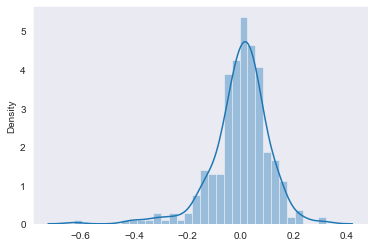

In [141]:
# Plotting the SNS histogram and finding the error terms
#fig = plt.figure()
#sns.distplot((y_train - y_train_price))
#fig.suptitle('Error Terms', fontsize = 12)
#plt.xlabel('Errors', fontsize = 12)

res = y_train - y_train_pred


plt.figure()
sns.distplot(res)
plt.show()

### Step 6: Prediction and Evaluation on Test data set

#### Making Predictions

In [142]:
bike_df_test.shape

(365, 32)

In [143]:
#create list of numeric vars
numeric_vars = ['atemp', 'hum', 'windspeed', 'cnt']

bike_df_test[numeric_vars] = min_max_scaler.transform(bike_df_test[numeric_vars])

#### Test data split into Predictor and Target Variable

In [144]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [145]:
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Heavy_Rain,weathersit_Light_Snow
184,0,1,0,0.769660,0.657364,0.078074,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.842587,0.610133,0.148050,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
299,0,0,1,0.496145,0.837699,0.329739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.335139,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
152,0,0,1,0.741471,0.314298,0.534310,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [146]:
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Heavy_Rain,weathersit_Light_Snow
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.487671,0.041096,0.673973,0.525096,0.644204,0.304528,0.257534,0.243836,0.252055,0.246575,0.101370,0.071233,0.084932,0.087671,0.084932,0.104110,0.082192,0.057534,0.068493,0.084932,0.082192,0.090411,0.106849,0.128767,0.150685,0.153425,0.167123,0.156164,0.136986,0.345205,0.630137
std,0.500534,0.198785,0.469401,0.213217,0.145885,0.159863,0.437876,0.429984,0.434789,0.431609,0.302232,0.257567,0.279162,0.283204,0.279162,0.305822,0.275034,0.233180,0.252937,0.279162,0.275034,0.287163,0.309346,0.335402,0.358233,0.360891,0.373598,0.363509,0.344305,0.476088,0.483430
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.049804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339801,0.534060,0.193797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.535113,0.640189,0.288004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.698389,0.744955,0.394322,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.814264,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
X_test.shape[1]

31

In [148]:
#add a constant
X_test_sm = sm.add_constant(X_test)

In [149]:
#drop all the columns, as you did in training the model
X_test_sm = X_test_sm.drop(['weekday_Sat','weekday_Tue','mnth_Apr','mnth_Mar',
                            'mnth_Oct','season_fall','weekday_Fri','mnth_Jul','weekday_Sun',
                            'holiday','weekday_Thu','weekday_Wed','mnth_Jun','mnth_May',
                            'season_spring','hum','weathersit_Light_Snow',
                            'mnth_Nov','mnth_Dec','mnth_Feb'], axis=1)

In [150]:
X_test_sm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep', 'weekday_Mon',
       'weathersit_Heavy_Rain'],
      dtype='object')

In [151]:
#predict y_test

y_test_pred = lr_drop_20.predict(X_test_sm)

In [152]:
#evaluate the model with help sk learn r2 score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7833455317175626

In [153]:
print(1-(1-r2_score(y_true=y_test, y_pred=y_test_pred))*((len(X_test)-1)/(len(X_test)-(X_test.shape[1])-1)))

0.7631764971327111
